In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


Import the necesssary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical

In [3]:
# load the data

train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

### Here we can see the shape of training data and test data
- (42000, 785) means 42000 samples and 784 features numbered from pixel0 to pixel783 and a label column
- (28000, 784) means 28000 samples and 784 features numbered from pixel0 to pixel783

In [4]:
print(f"Shape of training data: {train.shape}")
print(f"Shape of test data: {test.shape}")

Shape of training data: (42000, 785)
Shape of test data: (28000, 784)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### There are no missing values in both train dataset and test dataset.

In [7]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
train["label"].head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [10]:
train["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

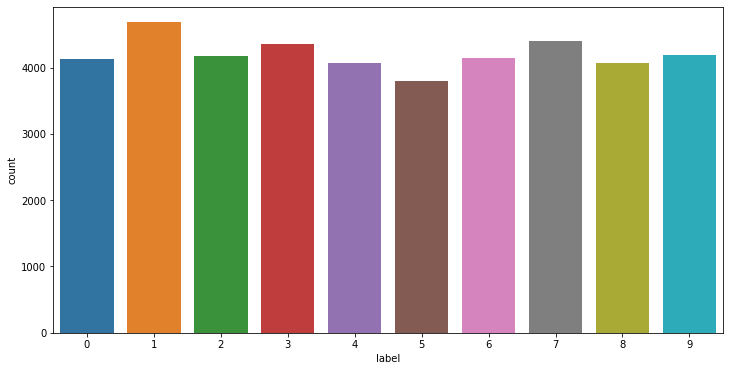

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(train["label"])

##### Now we need to split the train dataset into train and validation set

In [12]:
y_train = train["label"]
x_train = train.drop(labels=["label"], axis=1)

#### We need to normalize the data. As neural nets work better on values between (0 and 1) than values between (0 and 255).

In [13]:
# Normalize the data

x_train = x_train / 255.0
test = test / 255.0

Since the train and test images are in 28 * 28 format and the images are in grayscale format so 1 channel is used, so 28 * 28 * 1 matrix. If the images would have been in RGB then channels are 3 ie 28 * 28 * 3 matrix.

In [14]:
# Reshaping the data input (height = 28px, width = 28px , channel = 1)

x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [15]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

y_train = to_categorical(y_train, num_classes = 10)

Splitting the data into training and validation data. Here I have taken 10% for validation and remaining for training.

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=37)

In [17]:
print(f"x train shape: {x_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"x val shape: {x_val.shape}")
print(f"y val shape: {y_val.shape}")

x train shape: (37800, 28, 28, 1)
y train shape: (37800, 10)
x val shape: (4200, 28, 28, 1)
y val shape: (4200, 10)


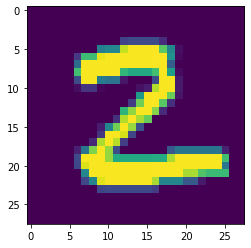

In [18]:
plt.imshow(x_train[7][:,:,0])

In [19]:
y_train[2]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Building the convolution neural network.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the last one. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

In [20]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                        activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                        activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                        activation ='relu'))


model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

2022-03-30 13:23:36.542497: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          3

In [22]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

2022-03-30 13:23:37.199568: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
591/591 [==============================] - 28s 45ms/step - loss: 0.3961 - accuracy: 0.8758 - val_loss: 0.0795 - val_accuracy: 0.9733
Epoch 2/5
591/591 [==============================] - 26s 44ms/step - loss: 0.1249 - accuracy: 0.9655 - val_loss: 0.0541 - val_accuracy: 0.9843
Epoch 3/5
591/591 [==============================] - 26s 44ms/step - loss: 0.0918 - accuracy: 0.9747 - val_loss: 0.0443 - val_accuracy: 0.9852
Epoch 4/5
591/591 [==============================] - 26s 44ms/step - loss: 0.0758 - accuracy: 0.9795 - val_loss: 0.0425 - val_accuracy: 0.9862
Epoch 5/5
591/591 [==============================] - 25s 43ms/step - loss: 0.0676 - accuracy: 0.9819 - val_loss: 0.0419 - val_accuracy: 0.9867


In [24]:
history.history

{'loss': [0.39609575271606445,
  0.12490373849868774,
  0.09177955240011215,
  0.07577577233314514,
  0.06757046282291412],
 'accuracy': [0.8757936358451843,
  0.9654762148857117,
  0.9747089743614197,
  0.9794709086418152,
  0.9818518757820129],
 'val_loss': [0.07946828007698059,
  0.05412037670612335,
  0.044288571923971176,
  0.042542796581983566,
  0.04185498133301735],
 'val_accuracy': [0.9733333587646484,
  0.9842857122421265,
  0.9852380752563477,
  0.9861904978752136,
  0.9866666793823242]}

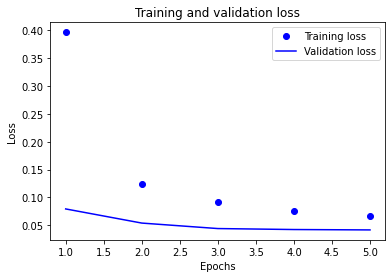

In [25]:
# Plot the loss and accuracy curves for training and validation

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# fig, ax = plt.subplots(2,1)
# ax[0].plot(history.history['loss'], color='b', label="Training loss")
# ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
# legend = ax[0].legend(loc='best', shadow=True)

# ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
# ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
# legend = ax[1].legend(loc='best', shadow=True)

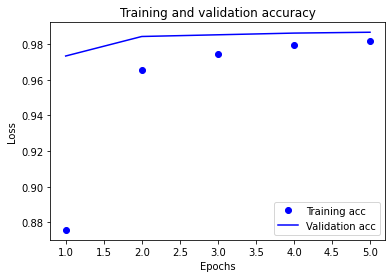

In [26]:
#plt.clf() # clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Validation Accuracy and training accuracy seems to be right hence we can say that the model does not overfit.

In [27]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred = pd.Series(y_pred, name='Label')
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)
sub.to_csv('mnist_submission.csv', index=False)